# Independent hypotheses

/home/antoniofarinhas/envs/chat/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


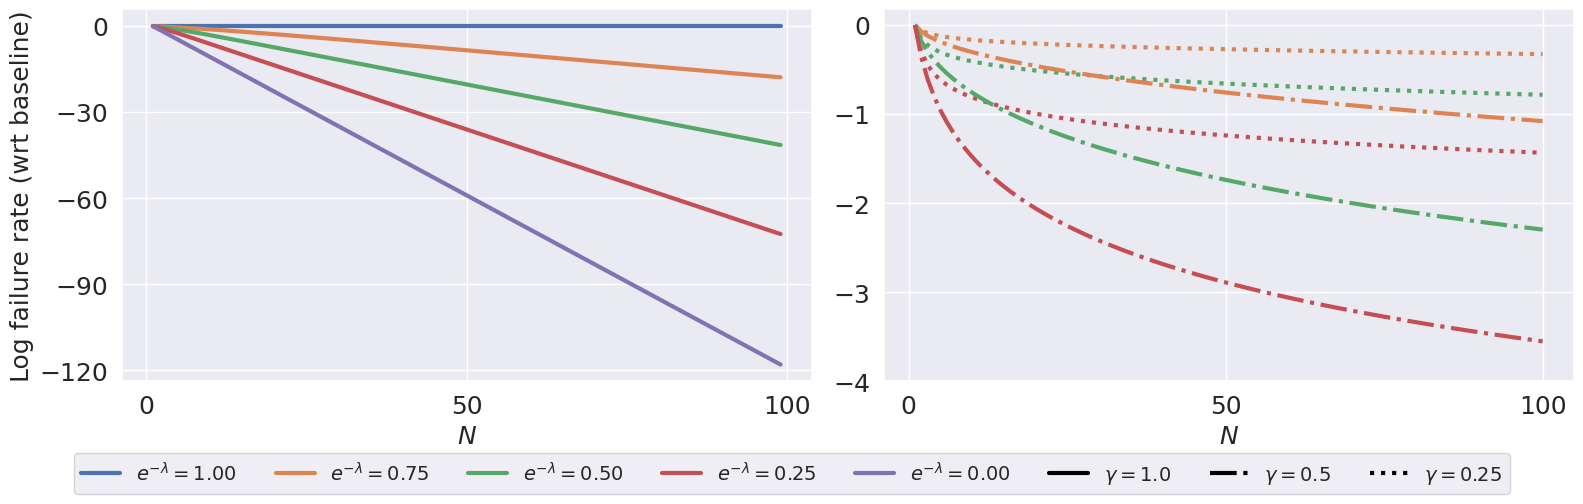

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.special import comb
from entmax import entmax_bisect
import torch

sns.set()

# Font and legend size settings
font_size = 18
legend_size = 14

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))


# Left: Mallows model
eps = 0.3
N = np.arange(1, 100)
ax1.plot(N, np.zeros_like(N), label='$e^{-\\lambda}=1.0$', linewidth=3.0, linestyle='solid', color='C0')  # random ranker
for q, color in zip([0.75, 0.5, 0.25], ['C1', 'C2', 'C3']):
    log_failure_rate = lambda N: np.log((q * (1 - eps) + eps) ** N - q ** N) - np.log(1 - q ** N)
    ax1.plot(N, log_failure_rate(N) - np.log(eps), label='$e^{-\\lambda}=%.2f$' % q, linewidth=3.0, color=color)
ax1.plot(N, N * np.log(eps) - np.log(eps), label='$e^{-\\lambda}=0.0$', linewidth=3.0, linestyle='solid', color='C4')  # perfect ranker
ax1.set_xlabel('$N$', fontsize=font_size)
ax1.set_ylabel('Log failure rate (wrt baseline)', fontsize=font_size)
ax1.set_xticks([0, 50, 100])
ax1.set_yticks([-120, -90, -60, -30, 0])
ax1.tick_params(axis='both', which='major', labelsize=font_size)

# Right: Zipf-Mandelbrot model
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
q_values = [0.75, 0.50, 0.25]
eps = 0.3
N = np.arange(1, 100 + 1)
entmax_alpha_values = [0.25, 0.5]
linestyles = ['dotted', 'dashdot']
for entmax_alpha, linestyle in zip(entmax_alpha_values, linestyles):
    for q, color in zip(q_values, ['C1', 'C2', 'C3']):
        log_failure_rate = np.zeros_like(N, dtype=float)
        for i, n in enumerate(N):
            somation = 0
            for K in range(n + 1):
                if q != 0:
                    x = torch.tensor((N[:n]) * np.log(q))
                    results_entmax = []
                    expression_values_entmax = entmax_bisect(x, alpha=entmax_alpha).tolist()
                    results_entmax.append(expression_values_entmax)
                    results_entmax = np.array(results_entmax)
                    somation_log = np.log(comb(n, K)) + K * np.log(eps) + (n - K) * np.log(1 - eps)
                    somation += np.exp(somation_log) * results_entmax[0][n - K:n].sum()
                else:
                    somation_log = np.log(comb(n, K)) + K * np.log(eps) + (n - K) * np.log(1 - eps)
                    somation += np.exp(somation_log) * np.sum(q ** (np.arange(n - K + 1, n + 1) - 1)) / np.sum(
                        q ** (np.arange(1, n + 1) - 1))
            result = somation
            log_failure_rate[i] = np.log(result)
        ax2.plot(N, log_failure_rate - np.log(eps), linewidth=3.0, linestyle=linestyle, color=color,
                 label='$\\gamma=%.2f$, $e^{-\\lambda}=%.2f$' % (entmax_alpha, q))

ax2.set_xlabel('$N$', fontsize=font_size)
ax2.set_xticks([0, 50, 100])
ax2.set_yticks([-4, -3, -2, -1, 0])
ax2.tick_params(axis='both', which='major', labelsize=font_size)

# Creating a single legend
lines = []
labels = []

# Colors for different e^-gamma values
for q, color in zip([1.0, 0.75, 0.5, 0.25, 0.0], ['C0', 'C1', 'C2', 'C3', 'C4']):
    line = plt.Line2D([0], [0], color=color, linewidth=3.0)
    lines.append(line)
    labels.append('$e^{-\\lambda}=%.2f$' % q)

# Linestyles for different gamma values
lines.append(plt.Line2D([0], [0], color='black', linewidth=3.0, linestyle='solid'))
labels.append('$\\gamma=1.0$')
lines.append(plt.Line2D([0], [0], color='black', linewidth=3.0, linestyle='dashdot'))
labels.append('$\\gamma=0.5$')
lines.append(plt.Line2D([0], [0], color='black', linewidth=3.0, linestyle='dotted'))
labels.append('$\\gamma=0.25$')

# Legend outside the plots
fig.legend(lines, labels, loc='lower center', fontsize=legend_size, ncol=8, bbox_to_anchor=(0.5, -0.075))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save figure
plt.savefig('indep_mallows_zipf-%.2f.pdf' % eps, bbox_inches='tight')
plt.show()


# Dependent hypotheses

/tmp/ipykernel_47080/325871051.py:22: RuntimeWarning: divide by zero encountered in log
  somation_log =  np.log(comb(n, K)) + np.sum(np.log(alpha + i_values_1 - 1)) + np.sum(np.log(beta + i_values_2 - 1)) - np.sum(np.log(alpha + beta + i_values_3 - 1)) + np.log(np.sum(q**(t_values-1))) - np.log(np.sum(q**(j_values-1)))


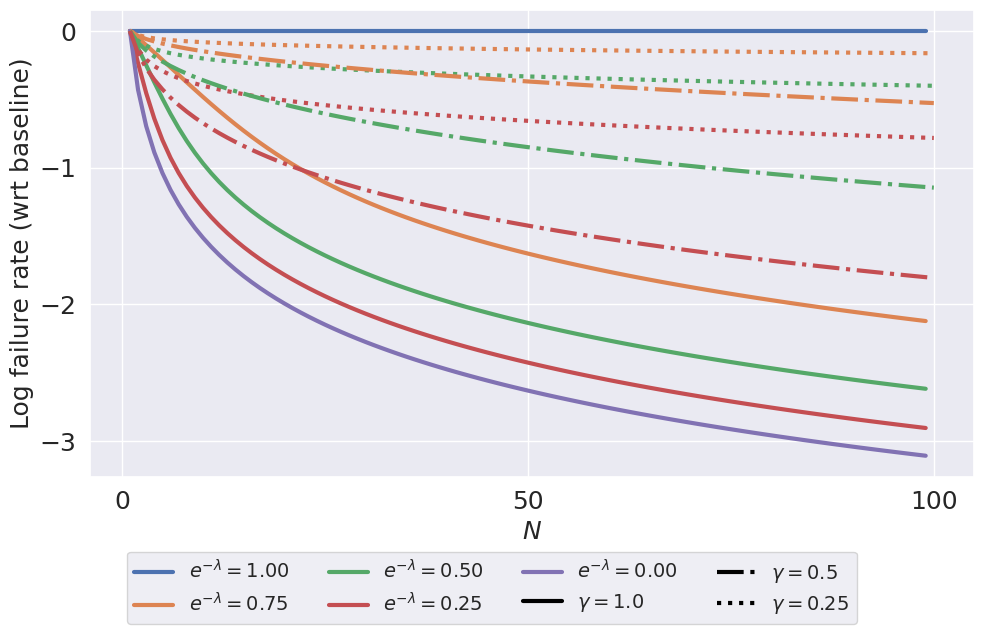

In [2]:
# Parameters
eps = 0.3
N = np.arange(1, 100)
alpha=0.3
beta = alpha * (1/eps - 1)

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Mallows model
for q, color in zip([1.0, 0.75, 0.5, 0.25, 0.0], ['C0', 'C1', 'C2', 'C3', 'C4']):
    log_failure_rate = np.zeros_like(N, dtype=float)
    for i, n in enumerate(N):
        somation = 0
        for K in range(n+1):
            i_values_1 = np.arange(1, K + 1)
            i_values_2 = np.arange(1, n - K + 1)
            i_values_3 = np.arange(1, n+1)
            t_values = np.arange(n-K+1, n+1)
            j_values = np.arange(1, n+1)        
            if q!= 0:
                somation_log =  np.log(comb(n, K)) + np.sum(np.log(alpha + i_values_1 - 1)) + np.sum(np.log(beta + i_values_2 - 1)) - np.sum(np.log(alpha + beta + i_values_3 - 1)) + np.log(np.sum(q**(t_values-1))) - np.log(np.sum(q**(j_values-1)))
                somation += np.exp(somation_log)
            else:
                somation_log =  np.log(comb(n, K)) + np.sum(np.log(alpha + i_values_1 - 1)) + np.sum(np.log(beta + i_values_2 - 1)) - np.sum(np.log(alpha + beta + i_values_3 - 1))
                somation += np.exp(somation_log)*np.sum(q**(t_values-1)) / np.sum(q**(j_values-1))
        result = somation
        log_failure_rate[i] = np.log(result)
    ax.plot(N, log_failure_rate - np.log(eps), label='$q=%.2f$' % q, linewidth=3.0, color=color)


ax.set_xlabel('$N$', fontsize=font_size)
ax.set_ylabel('Log failure rate (wrt baseline)', fontsize=font_size)
ax.set_xticks([0, 50, 100])
ax.set_yticks([-3, -2, -1, 0])
ax.tick_params(axis='both', which='major', labelsize=font_size)

# Zipf-Mandelbrot model
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
q_values = [0.75, 0.50, 0.25]
eps = 0.3
N = np.arange(1, 100 + 1)
entmax_alpha_values = [0.25, 0.5]
linestyles = ['dotted', 'dashdot']
for entmax_alpha, linestyle in zip(entmax_alpha_values, linestyles):
    for q, color in zip(q_values, ['C1', 'C2', 'C3']):
        log_failure_rate = np.zeros_like(N, dtype=float)
        for i, n in enumerate(N):
            somation = 0
            for K in range(n+1):
                i_values_1 = np.arange(1, K + 1)
                i_values_2 = np.arange(1, n - K + 1)
                i_values_3 = np.arange(1, n+1)
                x = torch.tensor((N[:n]) * np.log(q))
                results_entmax = []
                expression_values_entmax = entmax_bisect(x, alpha=entmax_alpha).tolist()
                results_entmax.append(expression_values_entmax)
                results_entmax = np.array(results_entmax)
                somation += comb(n, K) * np.prod(alpha + i_values_1 - 1) * np.prod(beta + i_values_2 - 1) / np.prod(alpha + beta + i_values_3 - 1) * results_entmax[0][n-K:n].sum()
            result = somation
            log_failure_rate[i] = np.log(result)
        ax.plot(N, log_failure_rate - np.log(eps), linewidth=3.0, linestyle=linestyle, color=color,
                 label='$\\gamma=%.2f$, $e^{-\\lambda}=%.2f$' % (entmax_alpha, q))

# Creating a single legend
lines = []
labels = []

# Colors for different e^-gamma values
for q, color in zip([1.0, 0.75, 0.5, 0.25, 0.0], ['C0', 'C1', 'C2', 'C3', 'C4']):
    line = plt.Line2D([0], [0], color=color, linewidth=3.0)
    lines.append(line)
    labels.append('$e^{-\\lambda}=%.2f$' % q)

# Linestyles for different gamma values
lines.append(plt.Line2D([0], [0], color='black', linewidth=3.0, linestyle='solid'))
labels.append('$\\gamma=1.0$')
lines.append(plt.Line2D([0], [0], color='black', linewidth=3.0, linestyle='dashdot'))
labels.append('$\\gamma=0.5$')
lines.append(plt.Line2D([0], [0], color='black', linewidth=3.0, linestyle='dotted'))
labels.append('$\\gamma=0.25$')


# Legend outside the plots
fig.legend(lines, labels, loc='lower center', fontsize=legend_size, ncol=4, bbox_to_anchor=(0.5, -0.12))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save figure
plt.savefig('exchangeable_mallows_zipf-%.2f.pdf' % eps, bbox_inches='tight')
plt.show()


# Not asymptotically error free

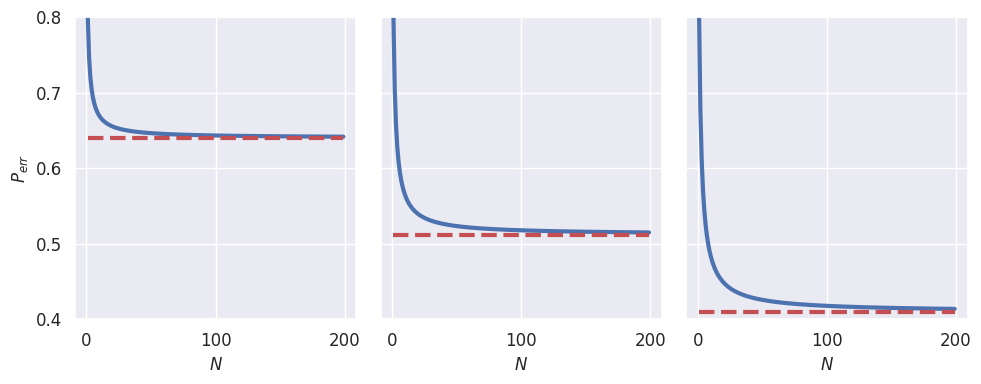

In [4]:
from scipy.special import binom

def calculate_error(r, eps=0.8, Nmax=500):
    err = np.zeros(Nmax-1)
    for N in range(1, Nmax):
        cum_prob = np.cumsum(np.arange(1, N+1, dtype="float64") ** r)
        cum_prob /= cum_prob[-1]
        err[N-1] = sum([binom(N, K) * eps**(K) * (1-eps)**(N-K) * cum_prob[K-1] for K in range(1, N+1)])
    return err

eps = 0.8
Nmax = 200
font_size = 12

fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True)

for i, r in enumerate([1, 2, 3], start=1):
    err = calculate_error(r, eps, Nmax)
    axs[i-1].plot(np.arange(1, Nmax), err, linewidth=3.0)
    axs[i-1].plot(np.arange(1, Nmax), np.zeros(Nmax-1) + eps**(r+1), 'r--', linewidth=3.0)
    axs[i-1].set_xlabel('$N$', fontsize=font_size)
    if r==1:
        axs[i-1].set_ylabel('$P_{err}$', fontsize=font_size)
    axs[i-1].set_xticks([0, 100, 200])
    axs[i-1].set_yticks([0.4, 0.5, 0.6, 0.7 ,0.8])
    axs[i-1].tick_params(axis='both', which='major', labelsize=font_size)
    axs[i-1].set_ylim(0.4, 0.8)

plt.tight_layout()
plt.savefig('imperfect-fail-r1-r2-r3.pdf', bbox_inches='tight')
plt.show()
